## Analysis of AMEO Data

### Introduction

#### Dataset Description
The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.
#### Objective
-The goal of this Exploratory Data Analysis (EDA) is to extensively investigate the provided dataset, with a particular emphasis on understanding the link between various variables and the target variable, Salary.

## Importing the libraries

In [216]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [65]:
pd.set_option('display.max_columns',100)
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\data.xlsx - Sheet1.csv")
df=data.copy()

In [66]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [68]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [69]:
df.duplicated().sum()

0

In [70]:
df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

## Data Cleaning

In [71]:
df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'],inplace=True)

In [72]:
df["DOL"] = df["DOL"].replace("present", datetime.today().date())

In [73]:
df["DOJ"]=pd.to_datetime(df["DOJ"])
df["DOL"]=pd.to_datetime(df["DOL"])
df["DOB"]=pd.to_datetime(df["DOB"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\4241144571.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DOJ"]=pd.to_datetime(df["DOJ"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\4241144571.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DOB"]=pd.to_datetime(df["DOB"])


In [75]:
df['12graduation']=pd.to_datetime(df["12graduation"], format='%Y')

In [81]:
df["CollegeTier"]=df["CollegeTier"].astype("object")

In [83]:
df["CollegeCityTier"]=df["CollegeCityTier"].astype("object")

In [95]:
df["GraduationYear"]=df["GraduationYear"].replace(0,np.nan)

In [102]:
df.dropna(inplace=True)

In [103]:
df["GraduationYear"]=pd.to_datetime(df["GraduationYear"], format='%Y')

In [110]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [111]:
df.drop(columns = ["ComputerProgramming","ElectronicsAndSemicon","ComputerScience","MechanicalEngg",
                  "ElectricalEngg","TelecomEngg","CivilEngg"],inplace=True)

In [115]:
df.head

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2024-02-22,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007-01-01,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011-01-01,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2024-02-22,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007-01-01,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012-01-01,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2024-02-22,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010-01-01,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014-01-01,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2024-02-22,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007-01-01,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011-01-01,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008-01-01,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012-01-01,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006-01-01,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,Haryana,2010-01-01,365,334,475,0.276047,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009-01-01,93.00,state board,2,B.Tech/B.E.,electronics and communication engineering,77.30,1,Telangana,2013-01-01,415,410,535,0.881620,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000.0,2013-07-01,2024-02-22,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008-01-01,65.50,"chse,odisha",2,B.Tech/B.E.,computer engineering,70.00,0,Orissa,2012-01-01,475,475,465,0.488348,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000.0,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010-01-01,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,1,Karnataka,2014-01-01,450,410,320,0.744758,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3997 entries, 0 to 3997
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3997 non-null   float64       
 1   DOJ                    3997 non-null   datetime64[ns]
 2   DOL                    3997 non-null   datetime64[ns]
 3   Designation            3997 non-null   object        
 4   JobCity                3997 non-null   object        
 5   Gender                 3997 non-null   object        
 6   DOB                    3997 non-null   datetime64[ns]
 7   10percentage           3997 non-null   float64       
 8   10board                3997 non-null   object        
 9   12graduation           3997 non-null   datetime64[ns]
 10  12percentage           3997 non-null   float64       
 11  12board                3997 non-null   object        
 12  CollegeTier            3997 non-null   object        
 13  Degree  

### Performing Exploratory Data Analysis

In [116]:
df.describe()

,Salary,DOJ,DOL,DOB,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.997000e+03,3997,3997,3997,3997.000000,3997,3997.000000,3997.000000,3997,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000,3997.000000
mean,3.076955e+05,2013-07-02 08:53:11.993995264,2019-01-17 19:03:29.857393152,1990-12-06 03:45:53.365023744,77.922672,2008-02-02 05:04:47.315486464,74.463680,71.486853,2012-08-10 22:39:39.584688640,501.600701,501.560420,513.336502,0.510428,-0.038124,0.146438,0.002838,-0.168984,-0.137834
min,3.500000e+04,1991-06-01 00:00:00,2005-03-01 00:00:00,1977-10-30 00:00:00,43.000000,1995-01-01 00:00:00,40.000000,6.450000,2007-01-01 00:00:00,180.000000,195.000000,120.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,2012-10-01 00:00:00,2014-11-01 00:00:00,1989-11-16 00:00:00,71.670000,2007-01-01 00:00:00,66.000000,66.400000,2012-01-01 00:00:00,425.000000,445.000000,430.000000,0.342315,-0.726400,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,2013-11-01 00:00:00,2015-05-01 00:00:00,1991-03-07 00:00:00,79.140000,2008-01-01 00:00:00,74.400000,71.720000,2013-01-01 00:00:00,500.000000,505.000000,515.000000,0.622643,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,2014-07-01 00:00:00,2024-02-22 00:00:00,1992-03-14 00:00:00,85.670000,2009-01-01 00:00:00,82.600000,76.330000,2014-01-01 00:00:00,570.000000,565.000000,595.000000,0.842248,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,2015-12-01 00:00:00,2024-02-22 00:00:00,1997-05-27 00:00:00,97.760000,2013-01-01 00:00:00,98.700000,99.930000,2017-01-01 00:00:00,875.000000,795.000000,900.000000,0.999910,1.995300,1.904800,2.535400,3.352500,1.822400
std,2.127639e+05,NaN,NaN,NaN,9.849837,NaN,10.999999,8.168246,NaN,104.908560,86.760216,122.289224,0.468714,1.028627,0.941893,0.951579,1.007701,1.008049


We can clearly observe the follwing findings:
- Minimun salary of a person is 35 thousand
- Maximum salary of a person is 40 lakhs

- Average 10th percentage is 77.92 %
- Average 12th percentage is 74.46 %
- Average college GPA is 71.48 %

- Maximum 10th percentage is 97.7 %
- Maximum 12th percentage is 98.7 %
- Maximum college GPA is 99.93 %

## Univariate Analysis

In [129]:
numerical_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant']
categorical_cols = ['Gender','Degree', 'Specialization', 'CollegeCityTier', 'CollegeState']

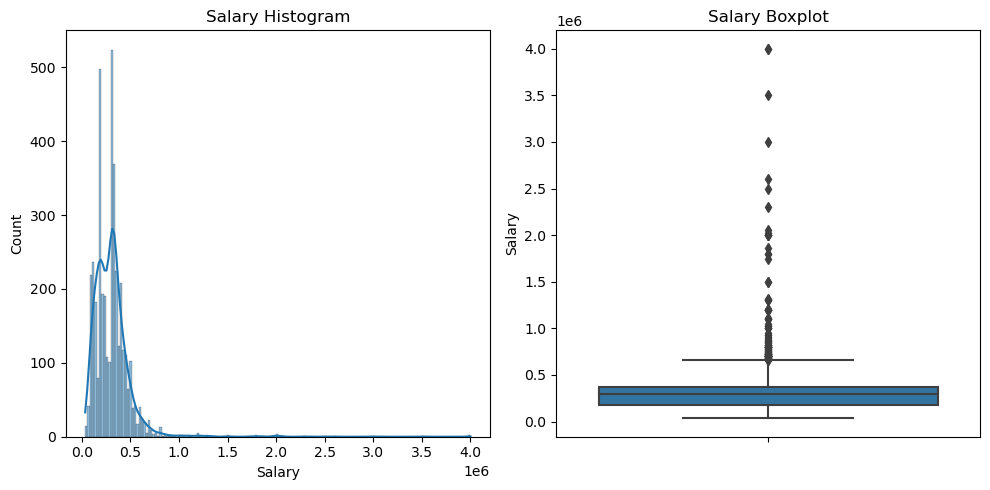

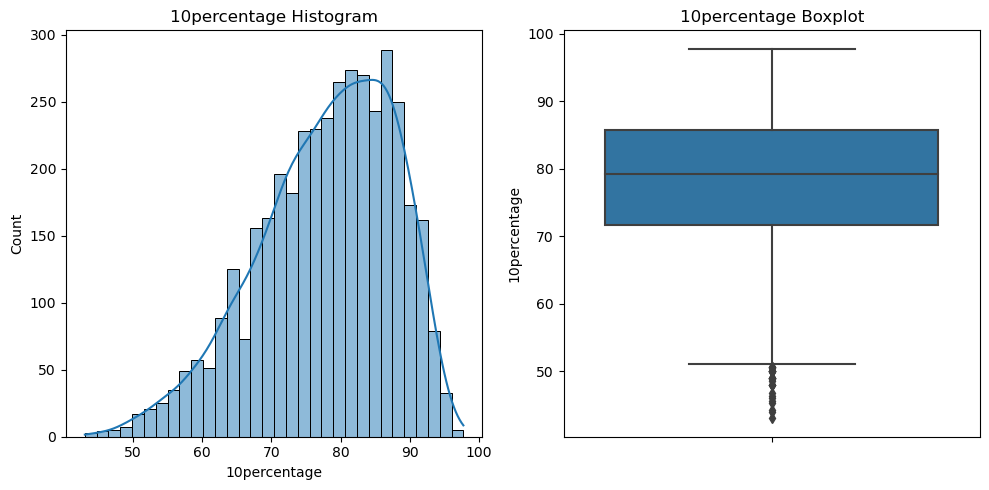

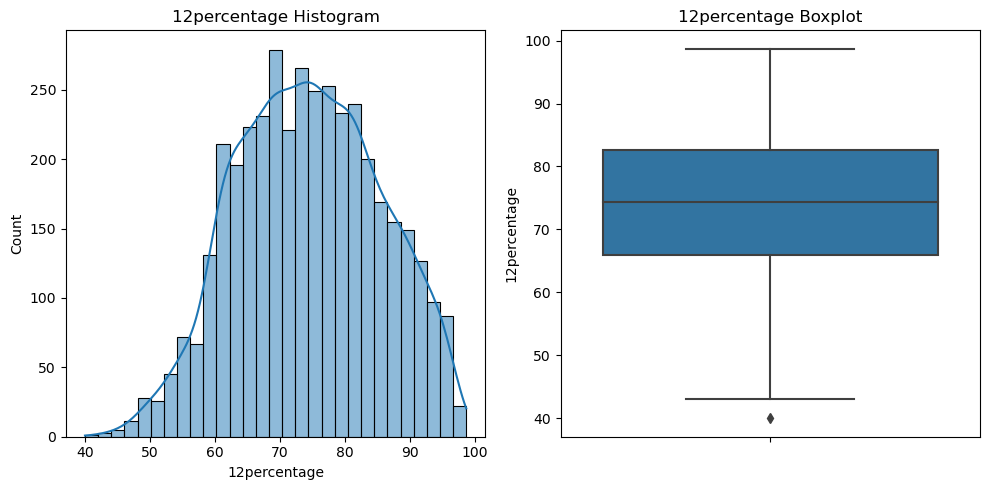

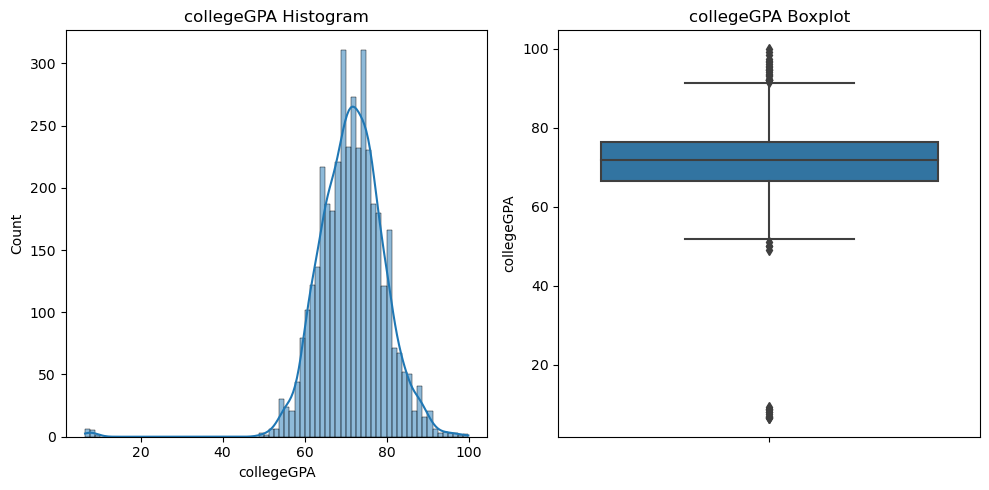

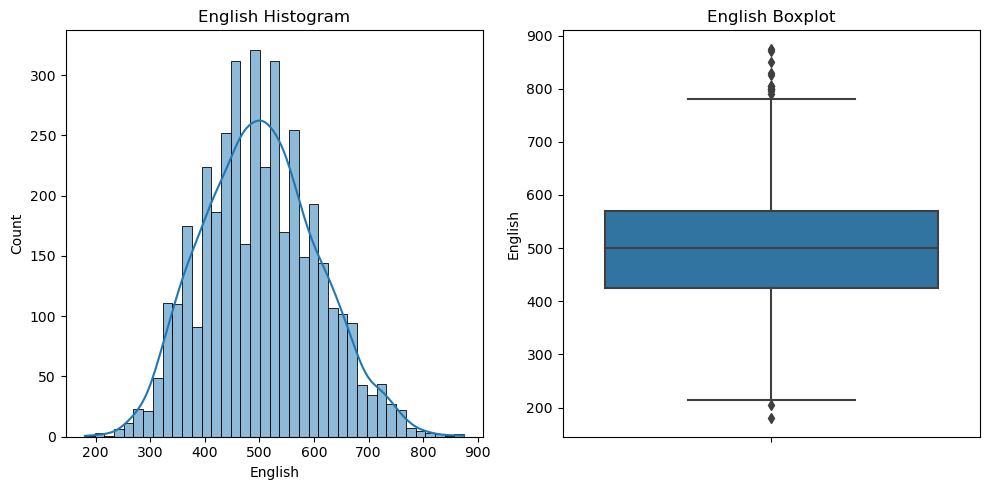

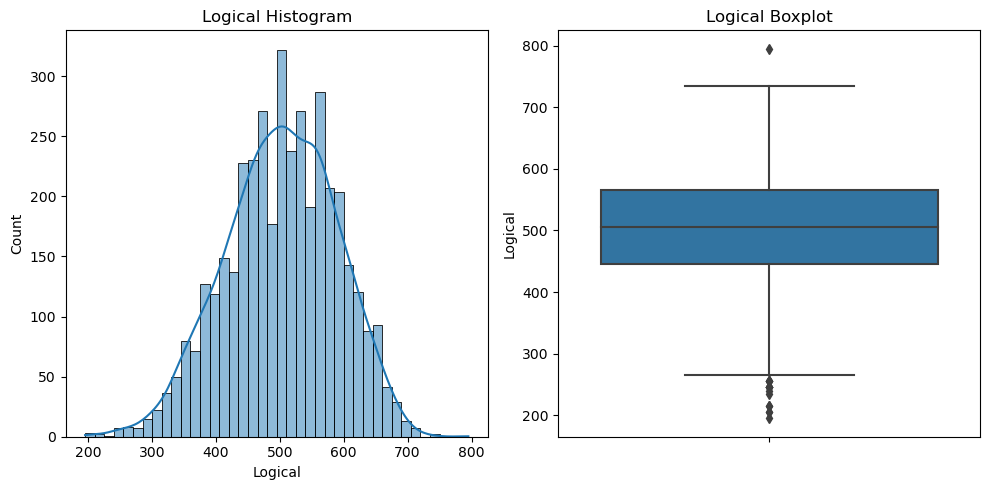

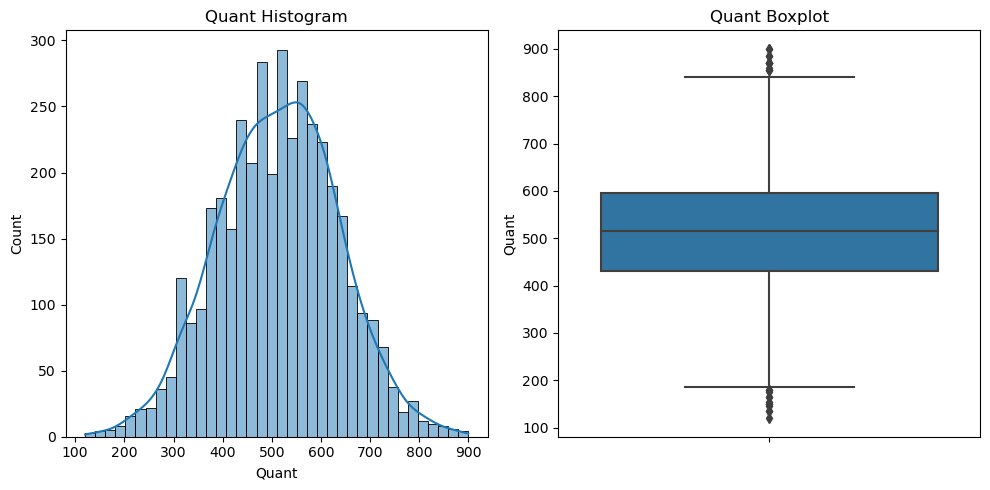

In [130]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Histogram')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
    
    plt.tight_layout()
    plt.show()


From hist and box plot of Salary
- there are 500 people in the data set who earn a salary less than 5 lakhs INR, and there are 100 people who earn a salary between 2.5 and 3.0.

From hist and box plot of 10percentage
- there are very less persons who scored less than 50%, and there is a increase in the density in between 79-87%
- there are few outliers at lower whisker which are < 50 % only

From hist and box plot of 12percentage
- there are more people whose percentage is >65 and <85 

From hist and box plot of AMCAT English section Score
- Around 300 people got >450 and <550 but only few pepople approximately 20 people who got highest score > 800

From hist and box plot of AMCAT Logical section Score
- most of the people scored betwwn 500 to 600 but only one got scored highest with 800

From hist and box plot of AMCAT Quantitative section Score
- there are few pepole who scored less than 200 and greater than 850
- most of them got scored beteen 500 to 550


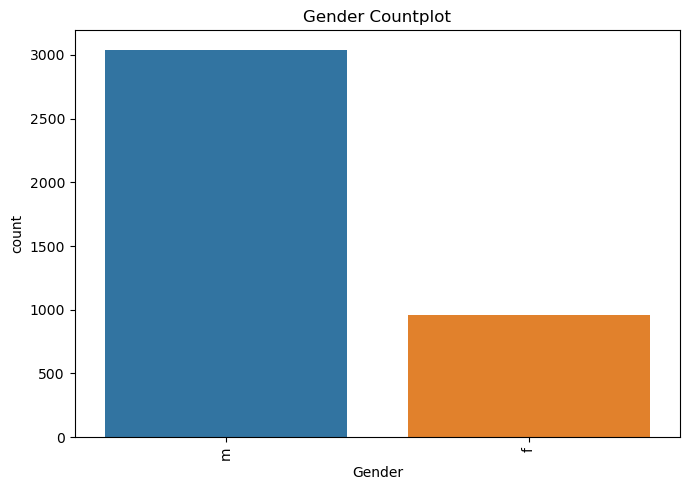

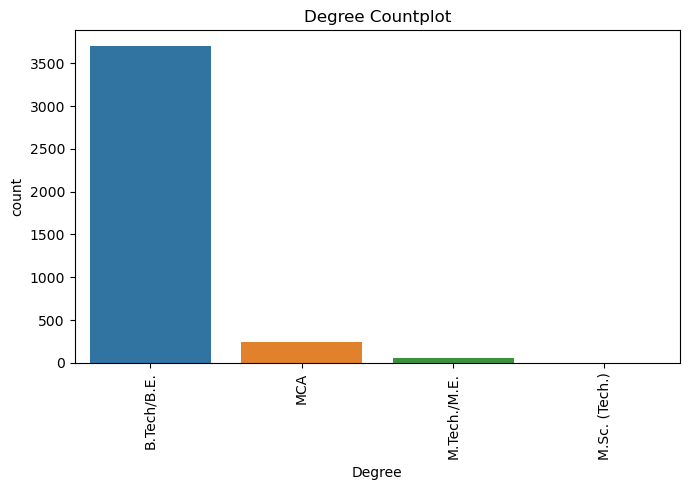

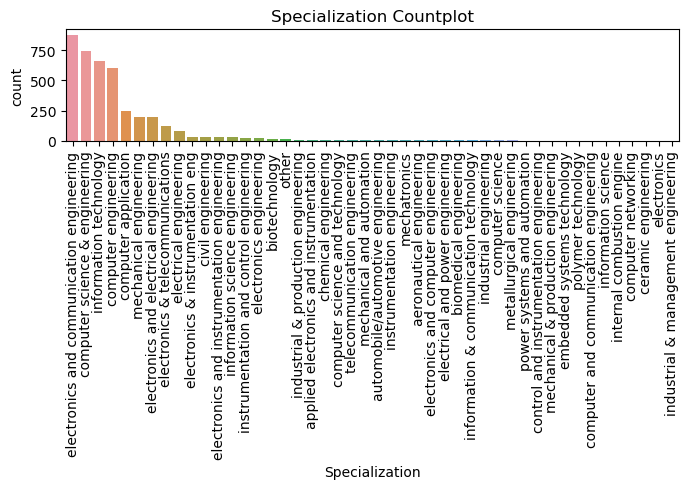

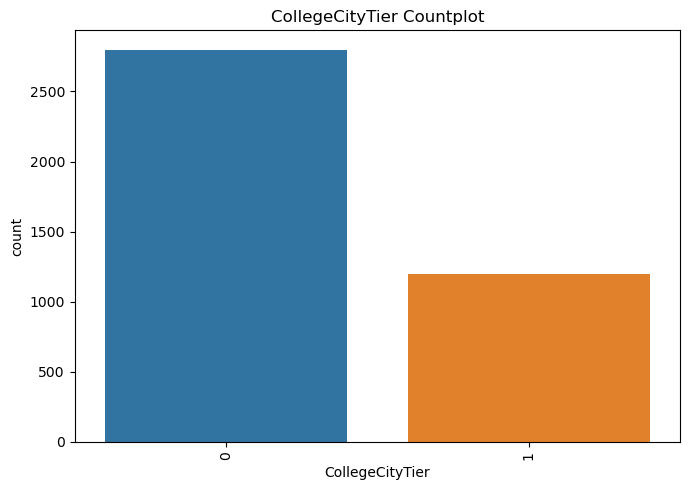

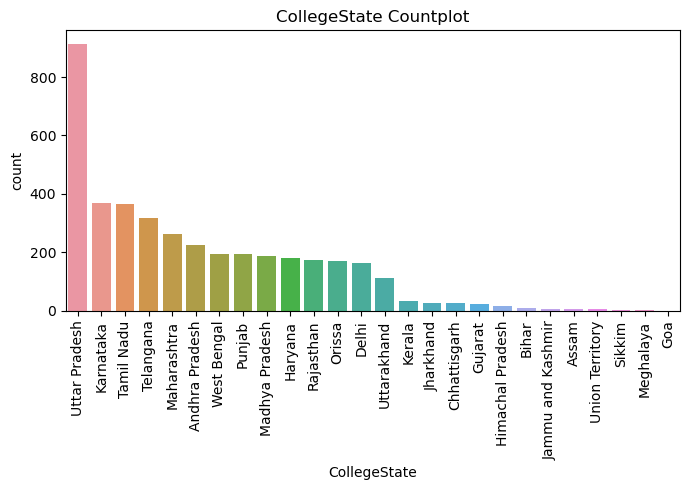

In [131]:
for col in categorical_cols:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Countplot')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

- There are more males employees compared to female employees
- Most of the employees are B.Tech/B.E graduates only and then from MCA but No one is from M.Sc.
- Most of the Graduates Specialization is Computer Science and Electronics & Communication Engineering and Information Technology
- Most of them are from collegecityTier 0 
- Most Gradutes college state is Uttar Pradesh and then Karnataka and then Tamil Nadu

In [161]:
df["GraduationYear"].dt.year.astype("object").value_counts().index

Index([2013, 2014, 2012, 2011, 2010, 2015, 2009, 2017, 2016, 2007], dtype='object', name='GraduationYear')

<Axes: xlabel='GraduationYear', ylabel='count'>

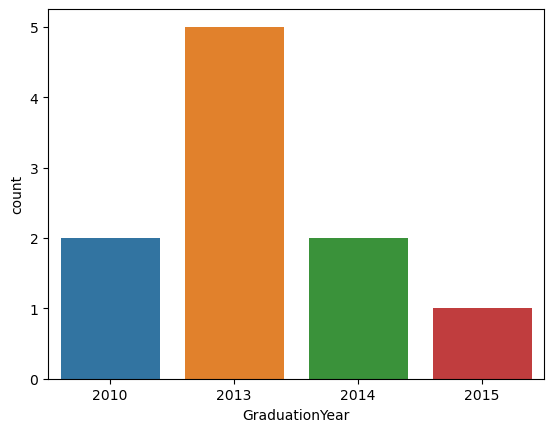

In [174]:
sns.countplot(data=df["GraduationYear"].dt.year,x=df["GraduationYear"].dt.year.value_counts().index)

- Most of the employees passed out in the year of 2013 and then 2010 and 2014

### Bivariate Analysis for relationships between numerical columns

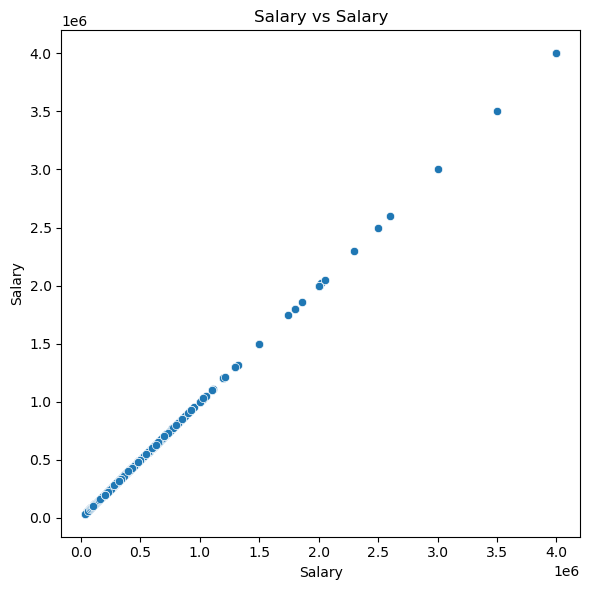

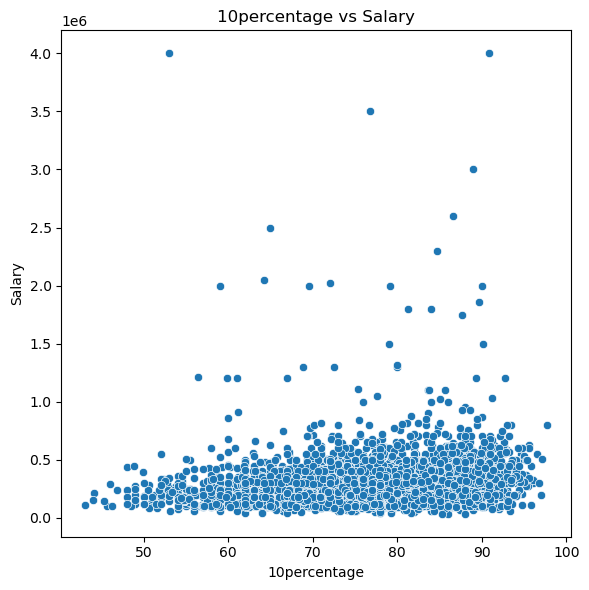

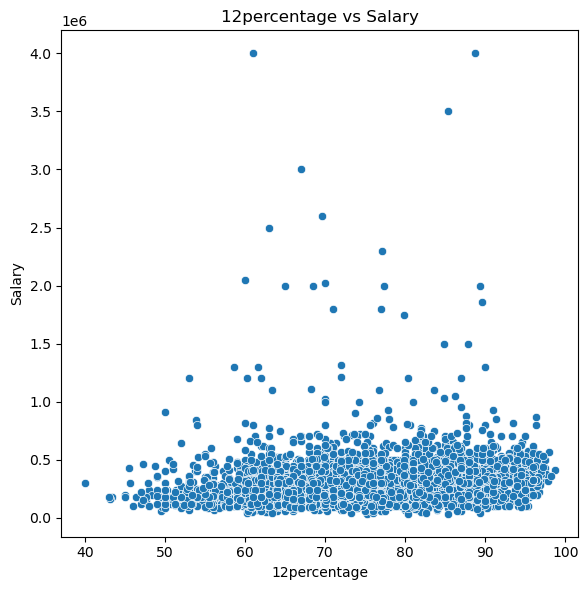

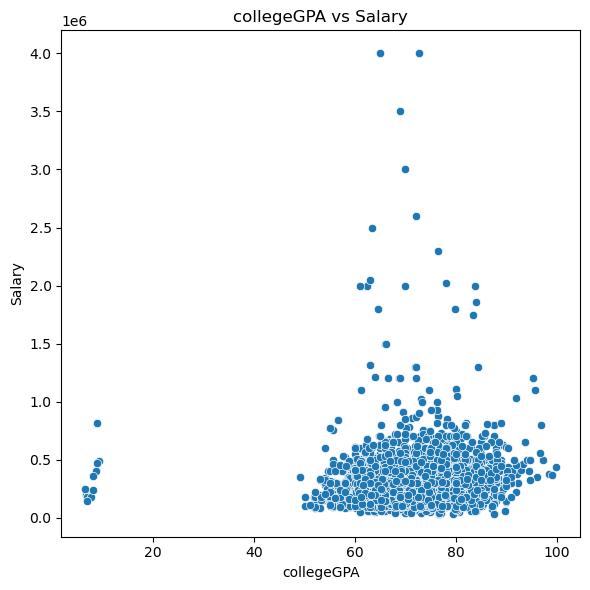

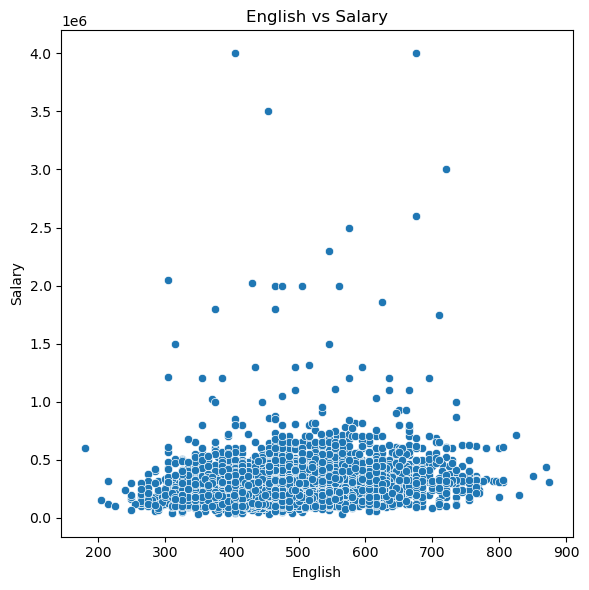

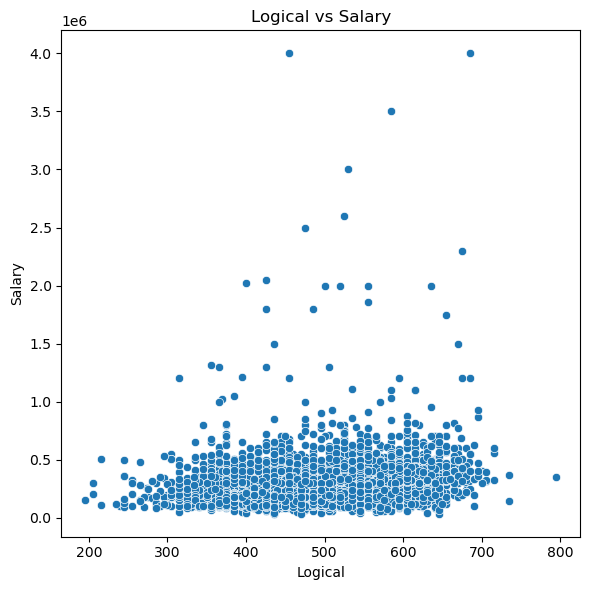

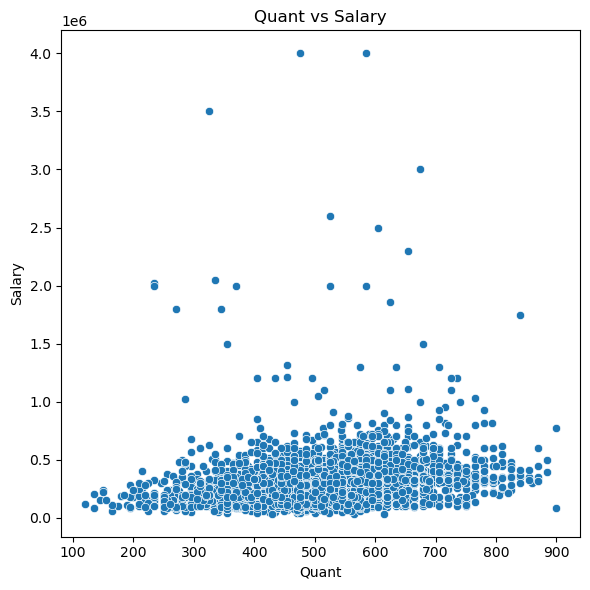

In [133]:
# Scatter plots between each numerical column and Salary
for col in numerical_cols:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=col, y='Salary')
    plt.title(f'{col} vs Salary')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.tight_layout()
    plt.show()

From the above plots we can observe that 
- as increase in percentage there is a slight increase in salary based on the 10th and 12th percentages but most of the employees salary is minimum which is less than 500000 only. it increases irrespective of their pecentages.

- But when it comes to college GPA vs Salary only the graduates which GPA >60 percentage has salary less than 5 lakhs but few people with percentage >75 has raise in salary between 10-40 lakhs.


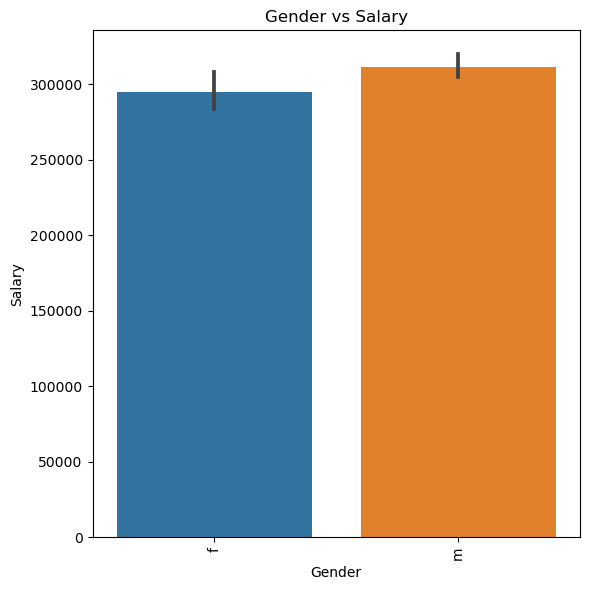

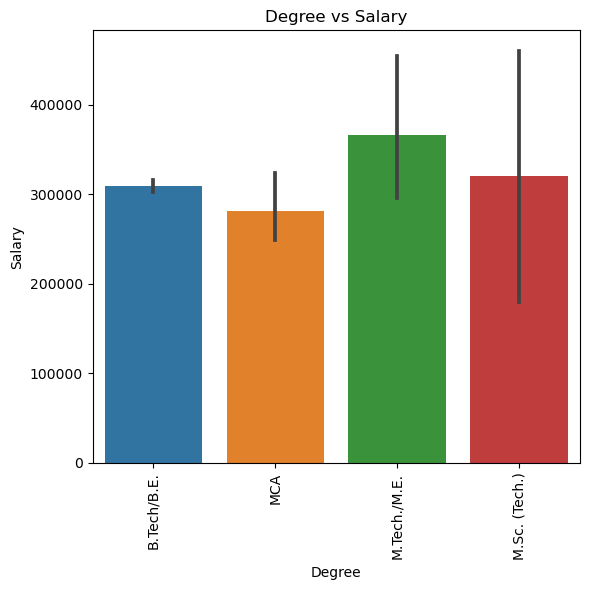

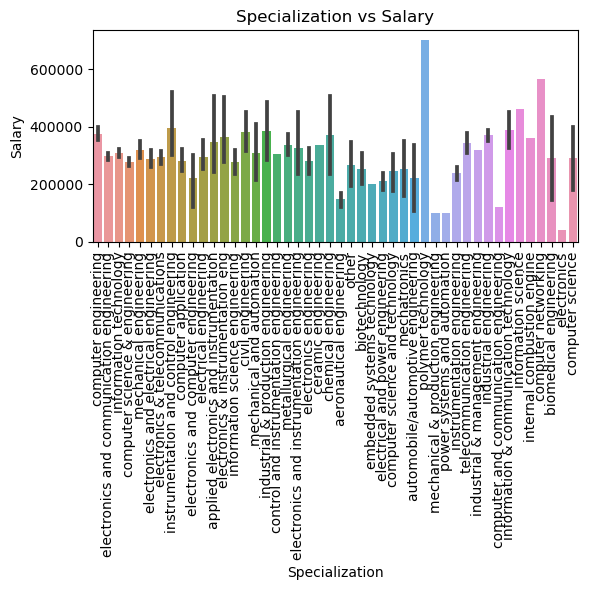

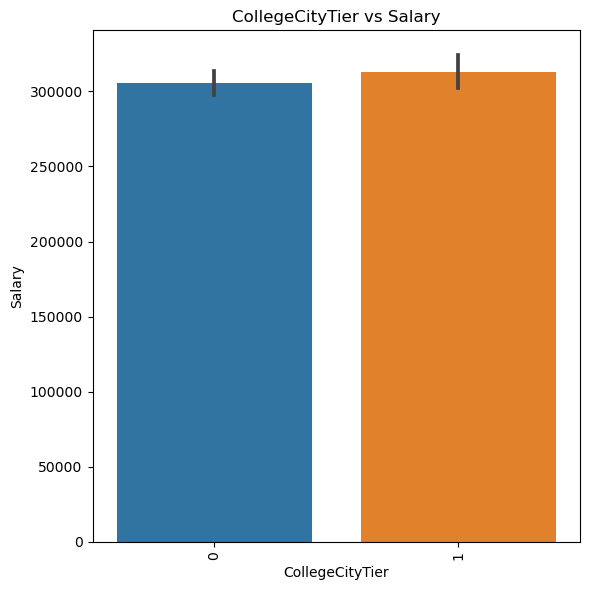

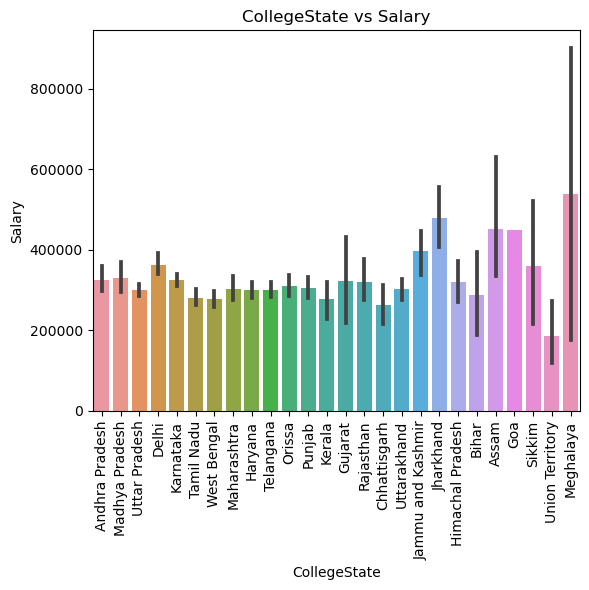

In [227]:
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=df, x=col, y='Salary')
    plt.title(f'{col} vs Salary')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

From the plot Gender Vs Salary
- Approximately Male and Female employees has similar salaries
- The employees who did M.tech has High salaries compared other degrees


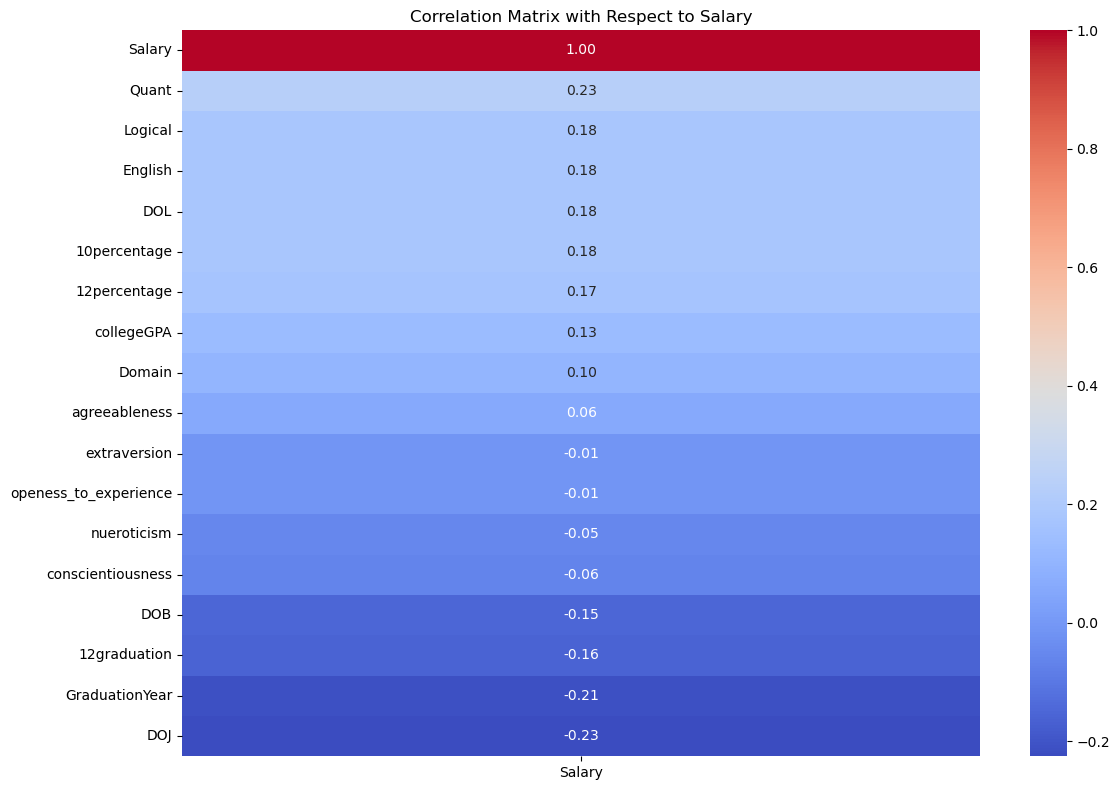

,Salary,DOJ,DOL,DOB,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Salary,1.000000,-0.225001,0.177970,-0.150707,0.177378,-0.161427,0.170255,0.130111,-0.212353,0.178257,0.179309,0.230653,0.104649,-0.064182,0.057418,-0.010206,-0.054682,-0.011292
DOJ,-0.225001,1.000000,0.246320,0.670925,0.071583,0.714107,0.032334,0.042714,0.812926,0.078087,0.045229,-0.048957,-0.067978,0.123216,0.033926,0.093883,-0.066552,-0.000946
DOL,0.177970,0.246320,1.000000,0.203458,0.157186,0.215728,0.136885,0.117874,0.201797,0.115660,0.114573,0.126010,0.036667,-0.005554,0.022336,0.014750,-0.047508,-0.029427
DOB,-0.150707,0.670925,0.203458,1.000000,0.244652,0.884353,0.267004,0.115819,0.751985,0.106930,0.100808,0.028349,-0.040395,0.104546,0.026559,0.059755,-0.079280,-0.010663
10percentage,0.177378,0.071583,0.157186,0.244652,1.000000,0.269725,0.643282,0.312686,0.096201,0.350466,0.315690,0.317381,0.078431,0.067358,0.136598,-0.004591,-0.132464,0.037012
12graduation,-0.161427,0.714107,0.215728,0.884353,0.269725,1.000000,0.258966,0.086101,0.793021,0.147496,0.105429,0.000992,-0.034335,0.103037,0.041099,0.062073,-0.074348,-0.014744
12percentage,0.170255,0.032334,0.136885,0.267004,0.643282,0.258966,1.000000,0.346265,0.060300,0.212554,0.243263,0.312190,0.073983,0.058037,0.103951,-0.007410,-0.094334,0.006602
collegeGPA,0.130111,0.042714,0.117874,0.115819,0.312686,0.086101,0.346265,1.000000,0.083082,0.106679,0.196837,0.217548,0.107301,0.069689,0.068304,-0.032711,-0.074877,0.027984
GraduationYear,-0.212353,0.812926,0.201797,0.751985,0.096201,0.793021,0.060300,0.083082,1.000000,0.121956,0.095017,-0.005972,-0.035928,0.115419,0.024752,0.082642,-0.083145,-0.011727
English,0.178257,0.078087,0.115660,0.106930,0.350466,0.147496,0.212554,0.106679,0.121956,1.000000,0.443904,0.375403,0.089521,0.034438,0.194960,0.018909,-0.155507,0.068524


In [145]:
numerical_cols=df.select_dtypes(exclude="object")

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Extract the correlation of "Salary" column with other columns
salary_correlation = correlation_matrix['Salary'].sort_values(ascending=False)

# Plot correlation matrix with respect to Salary
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Salary']].sort_values(by='Salary', ascending=False), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix with Respect to Salary')
plt.tight_layout()
plt.show()

correlation_matrix

Every feature is non related to salary. Each and every feature is independent

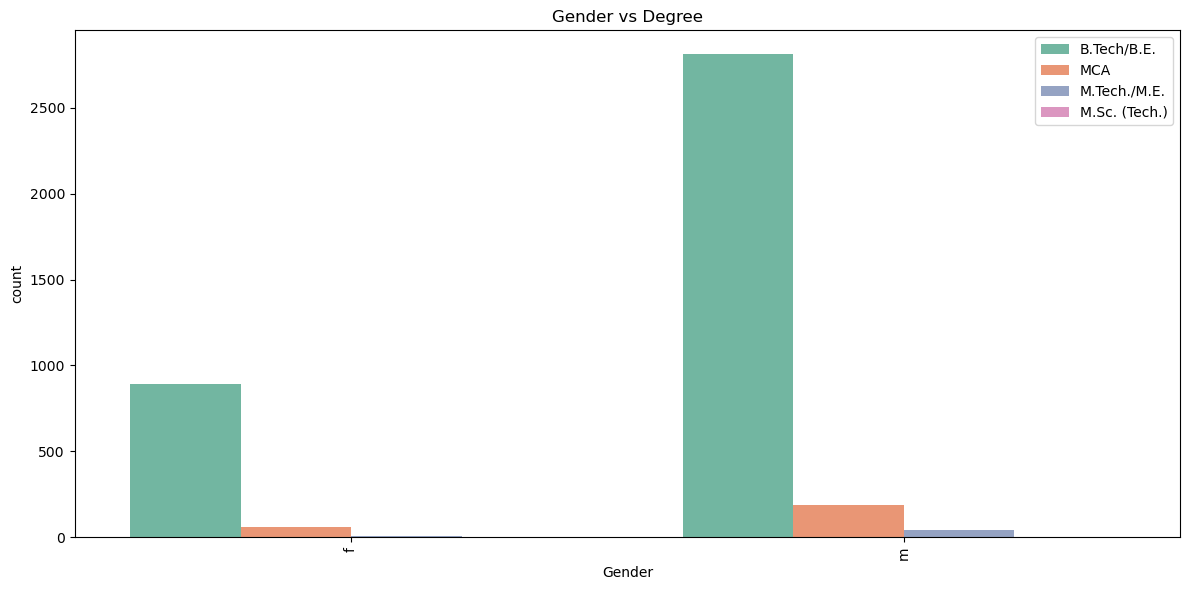

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\1766713878.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


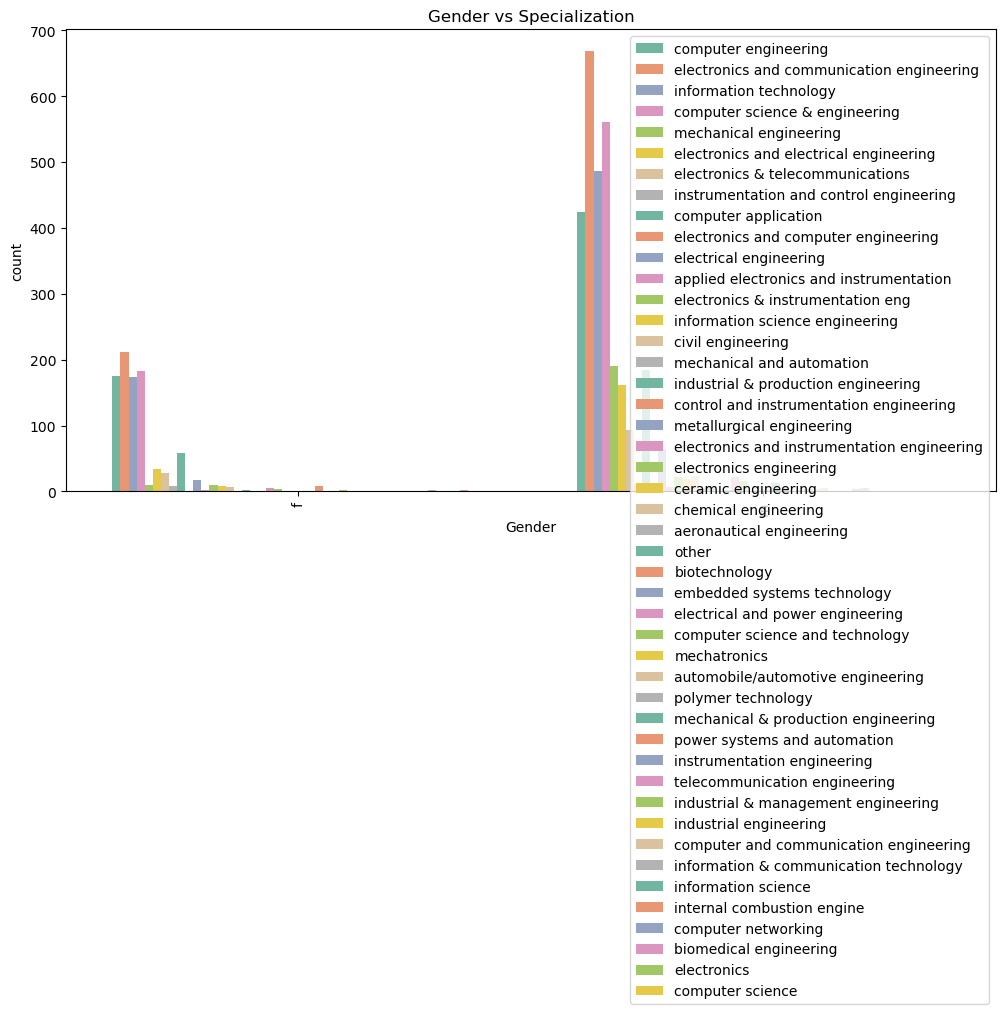

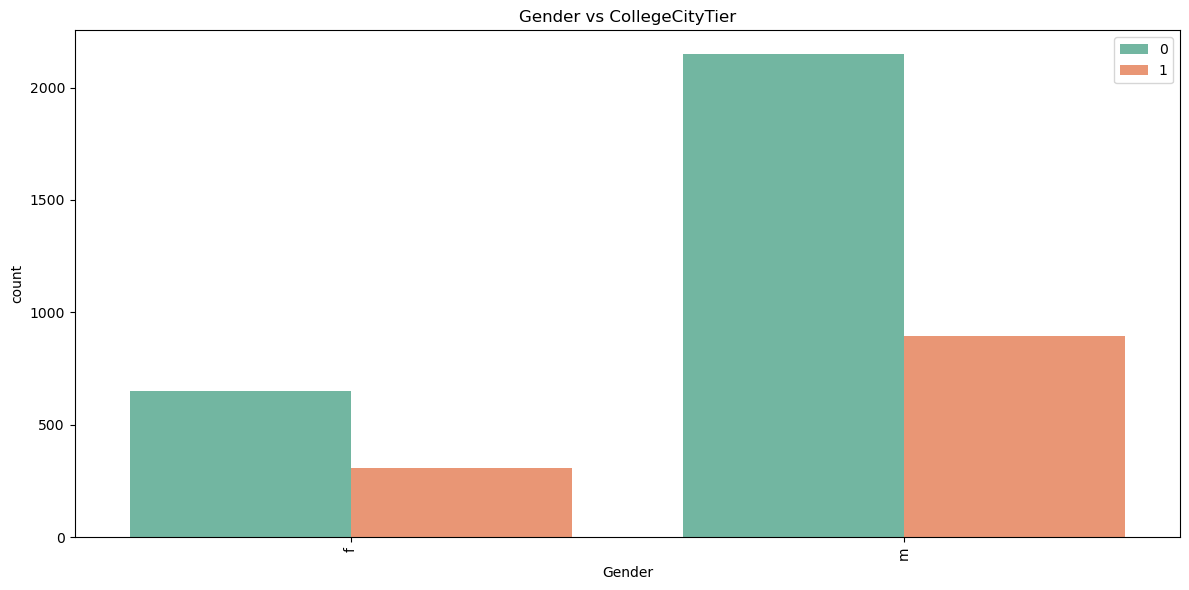

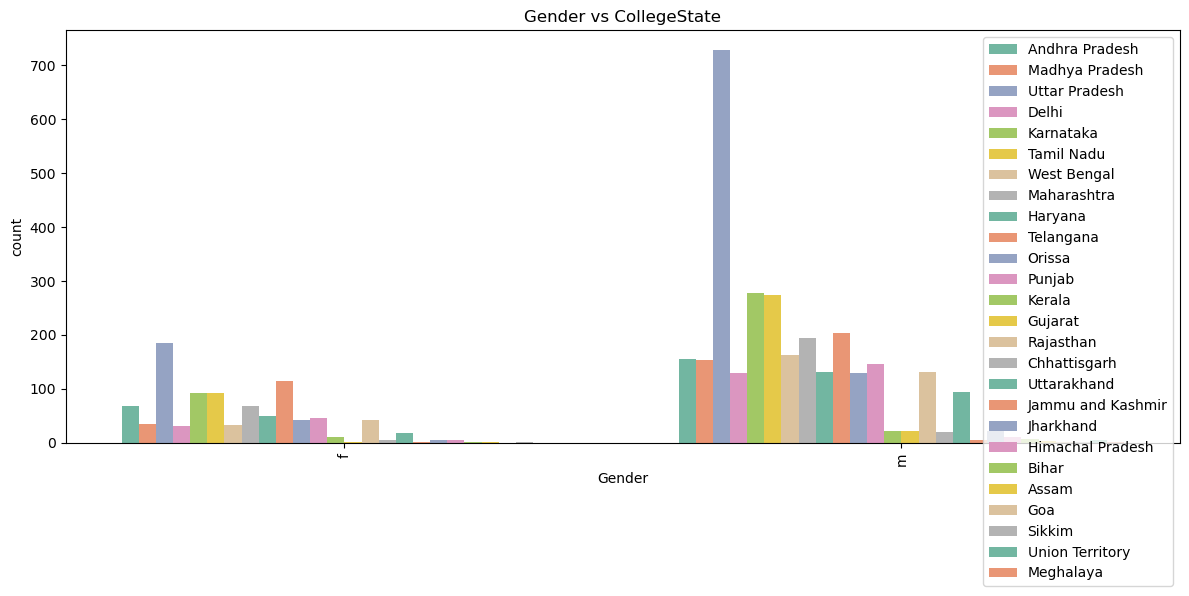

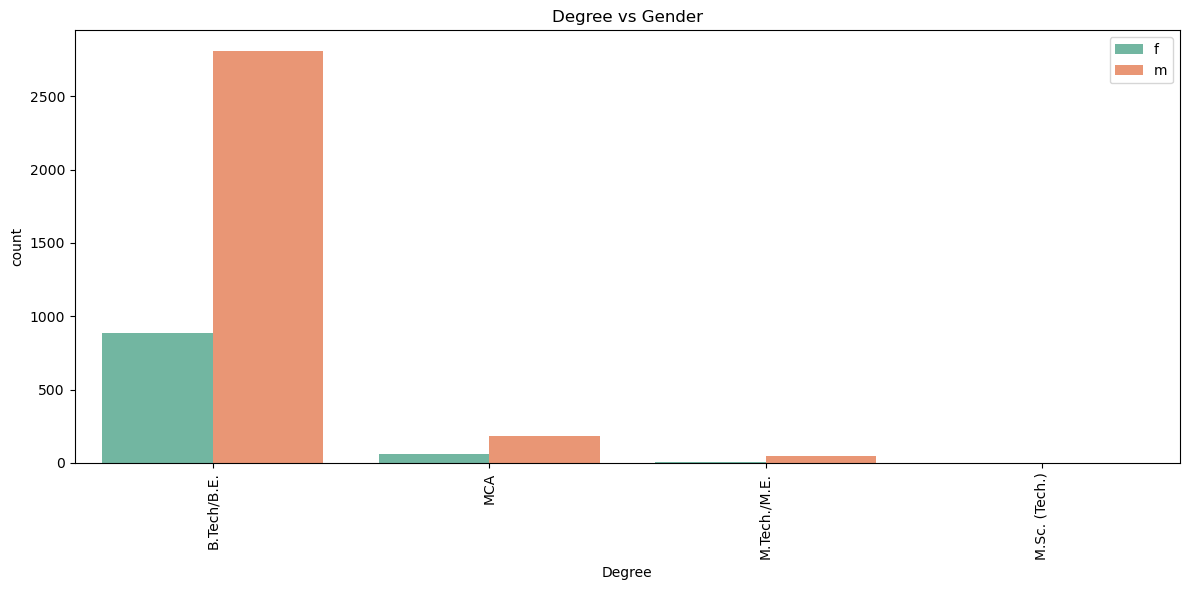

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\1766713878.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


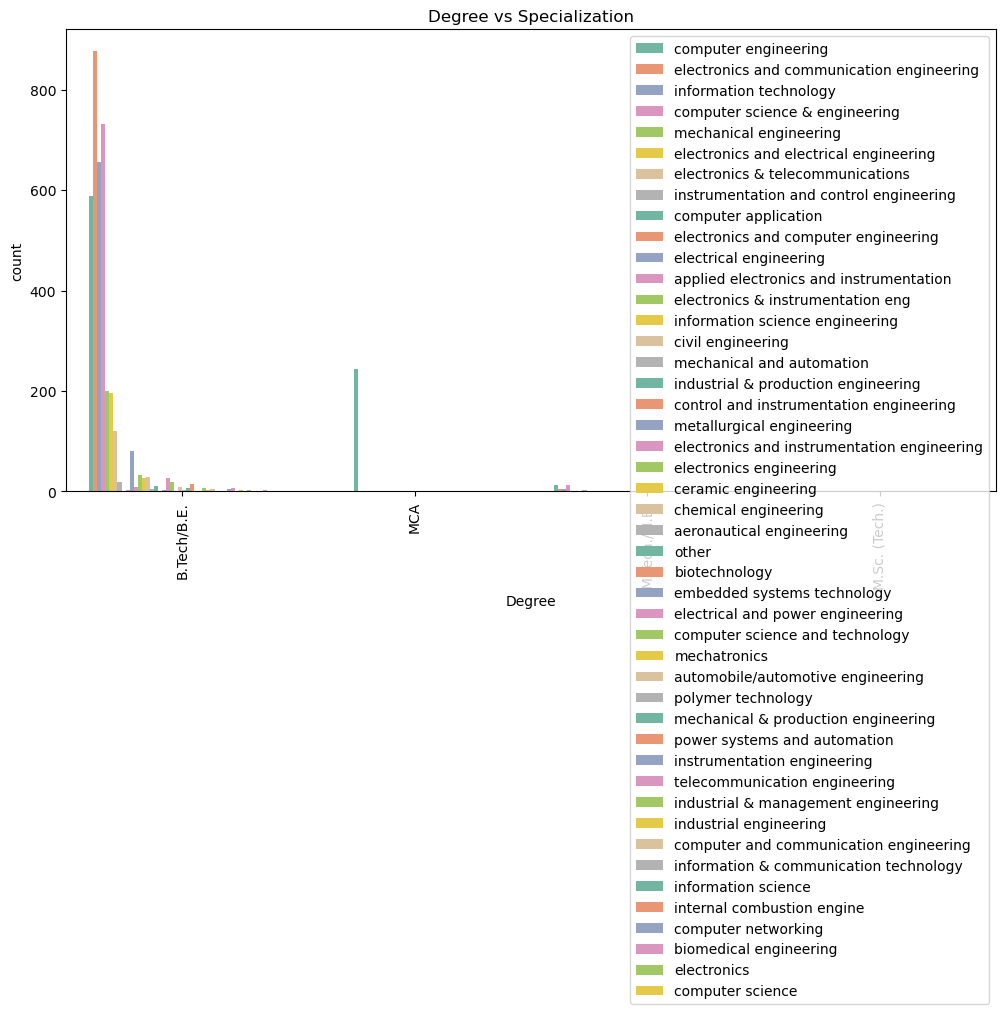

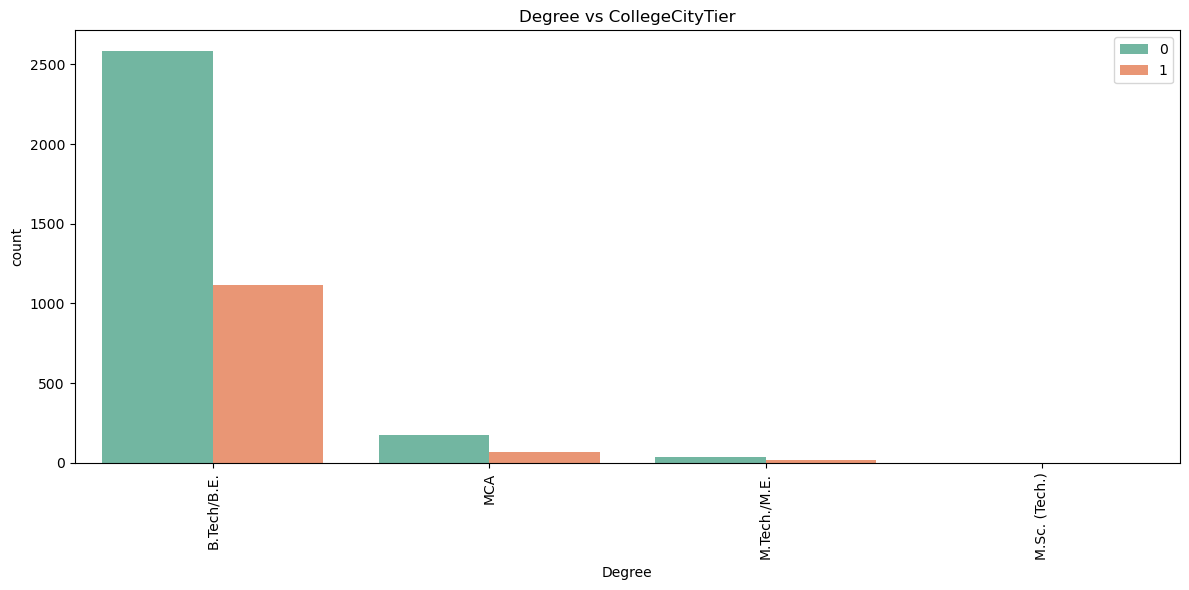

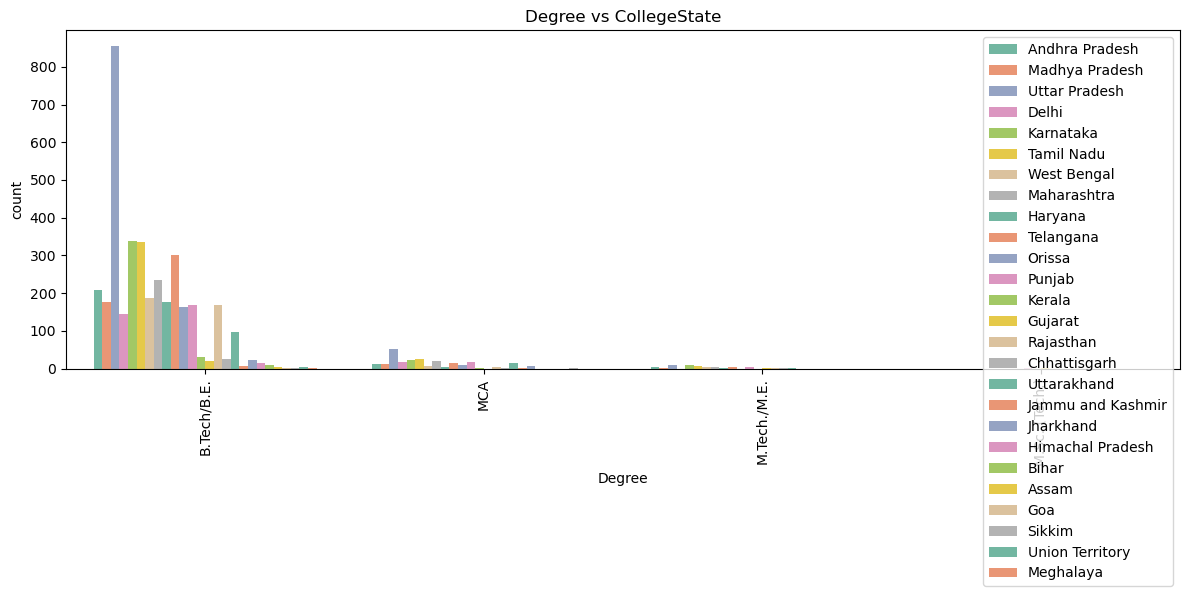

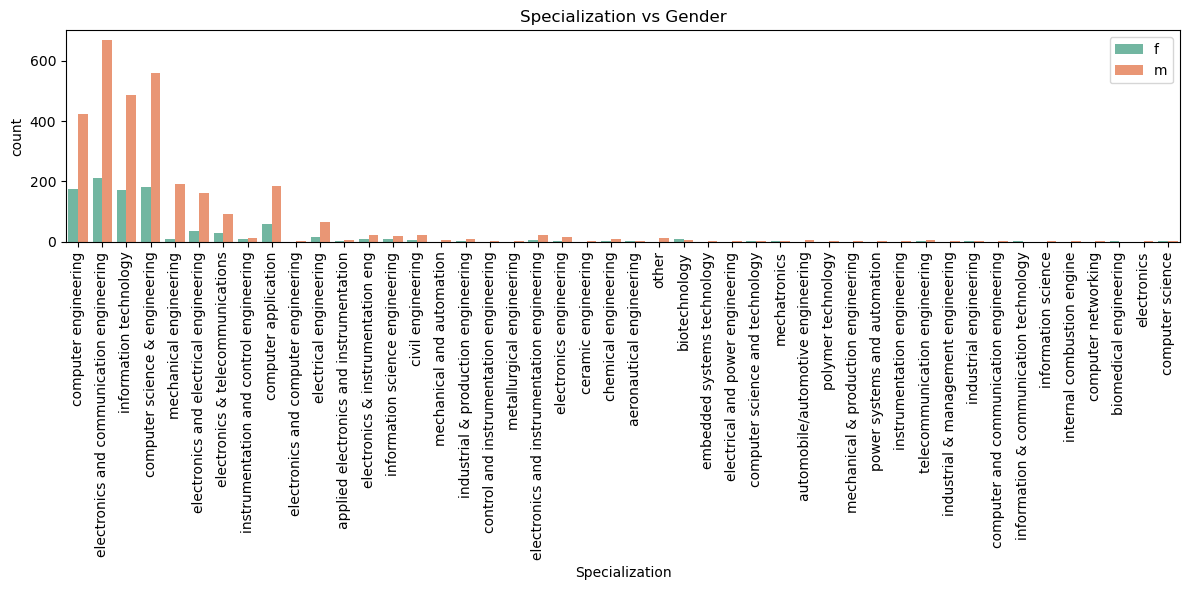

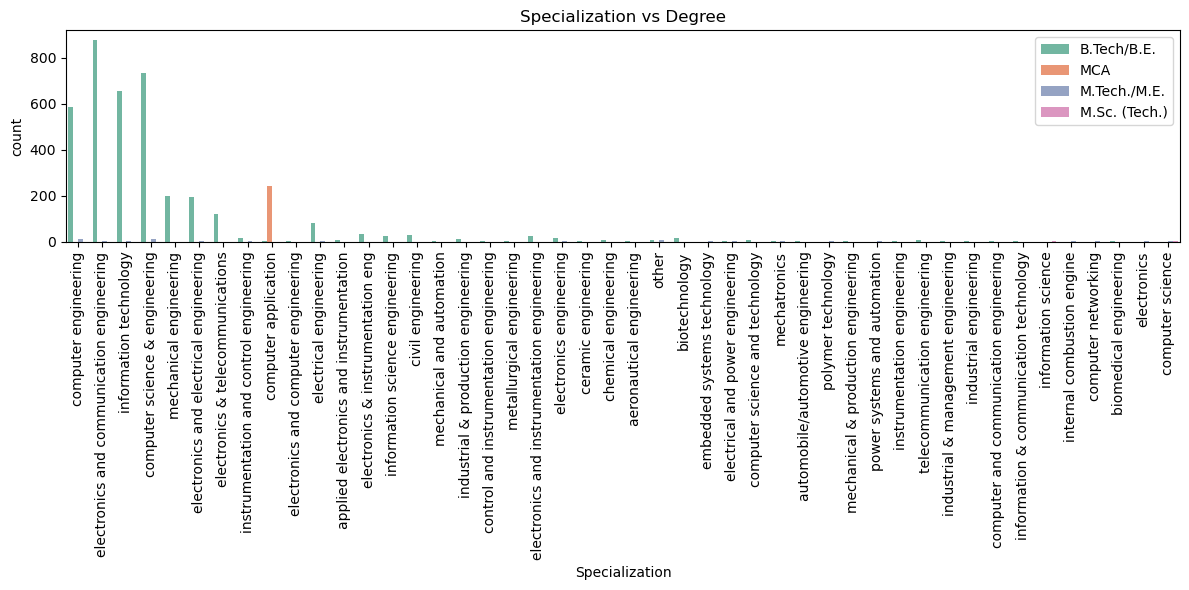

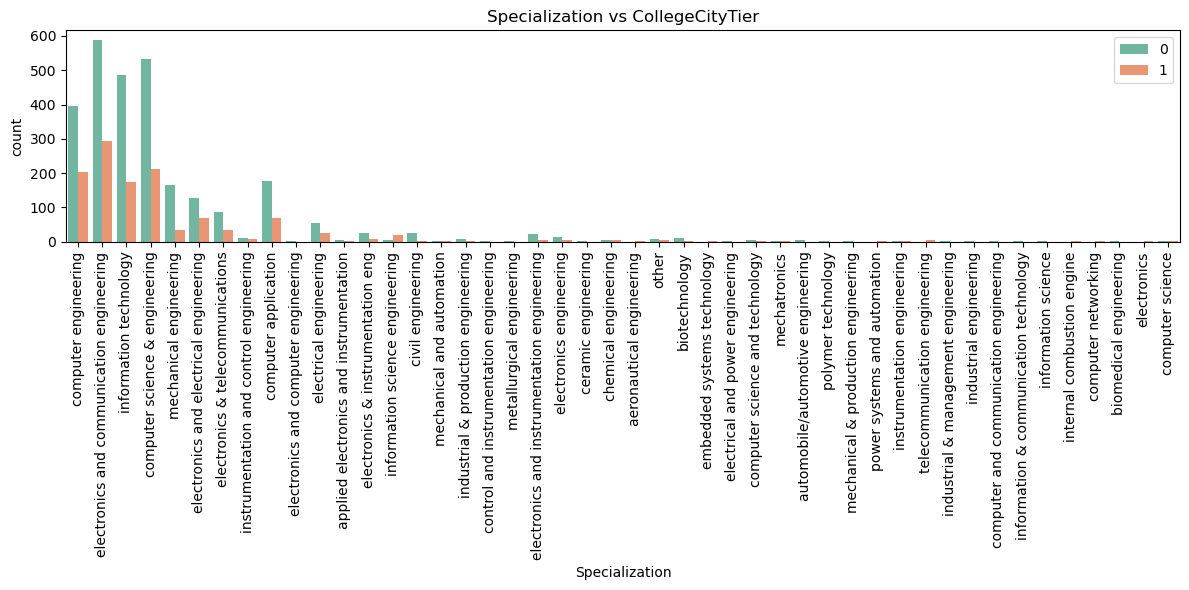

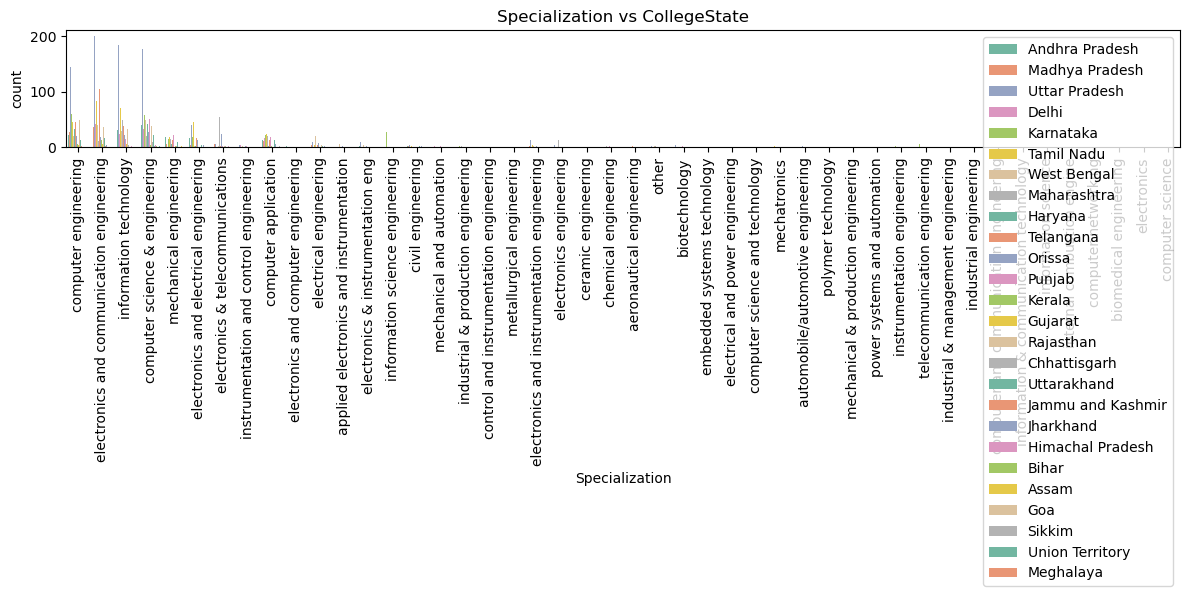

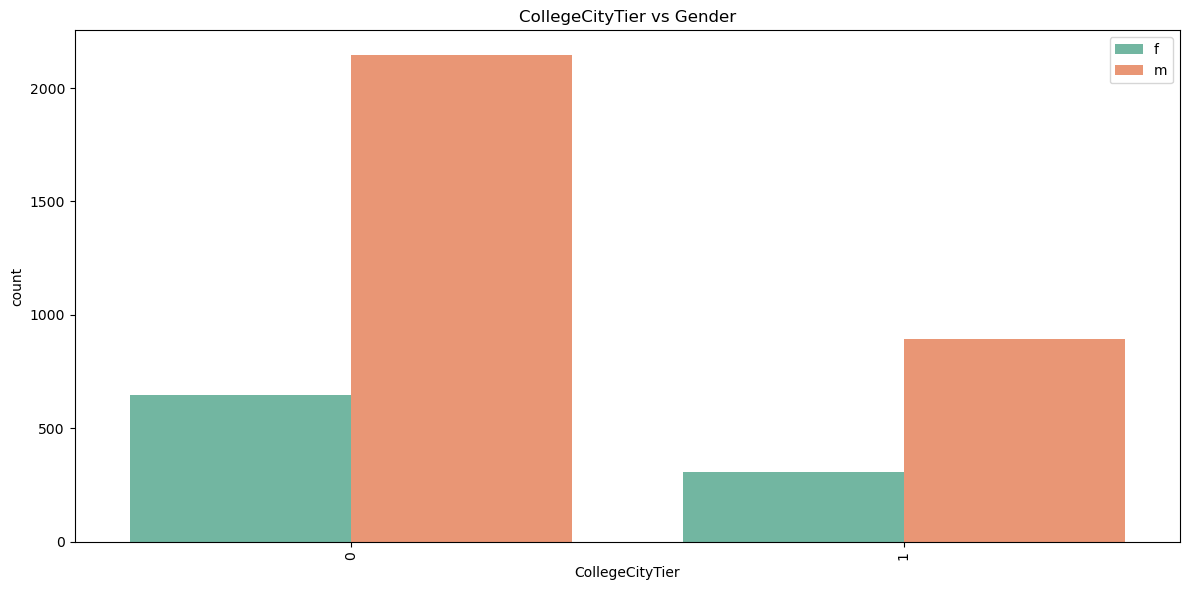

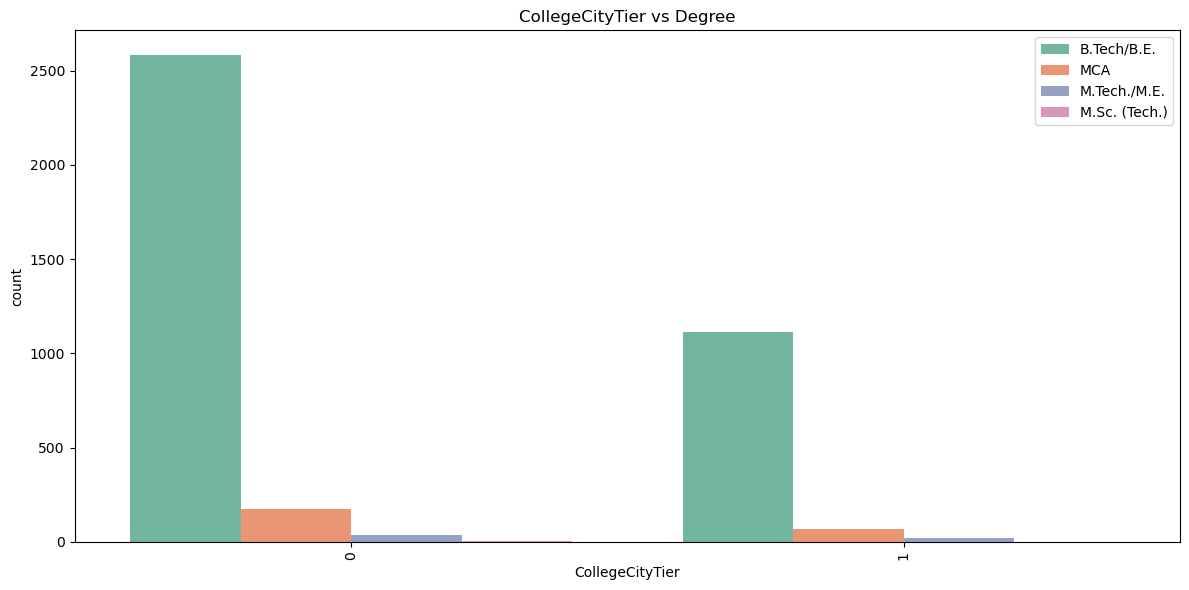

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\1766713878.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


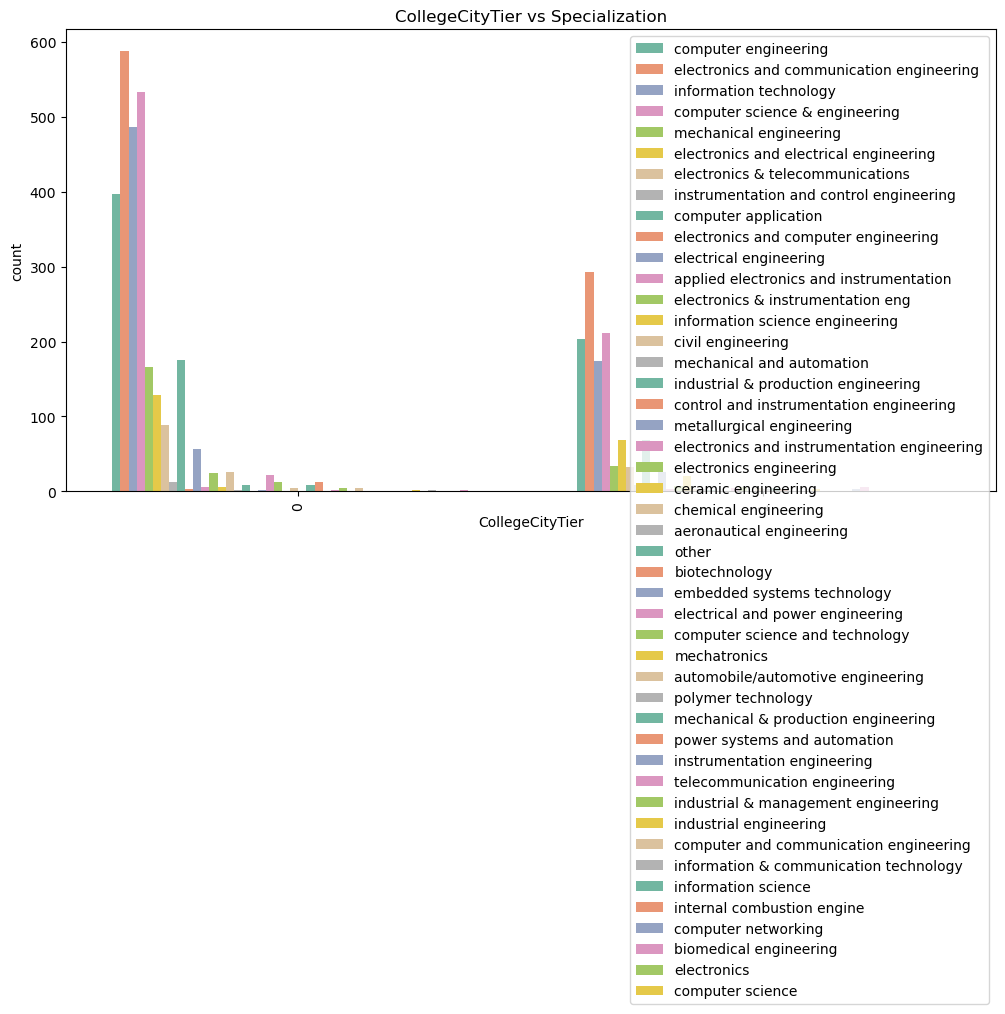

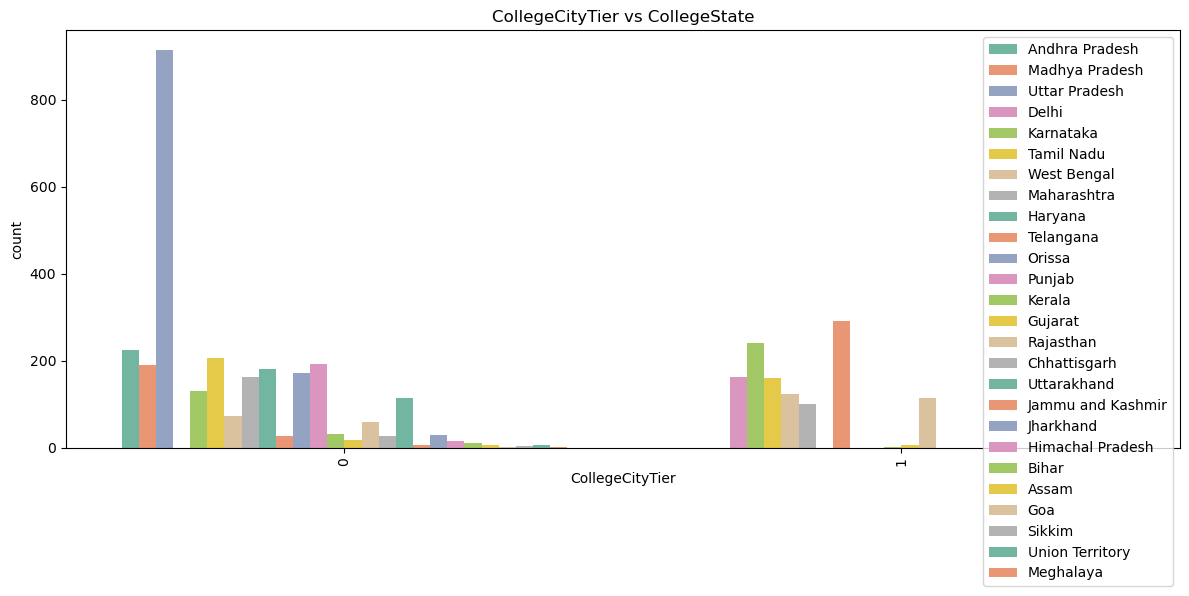

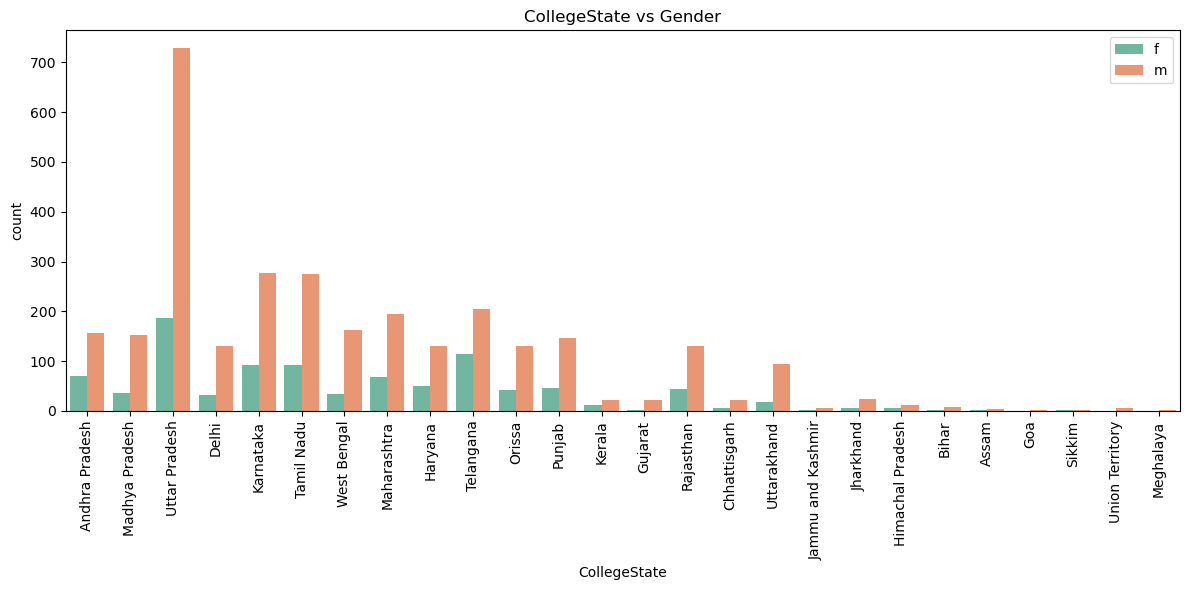

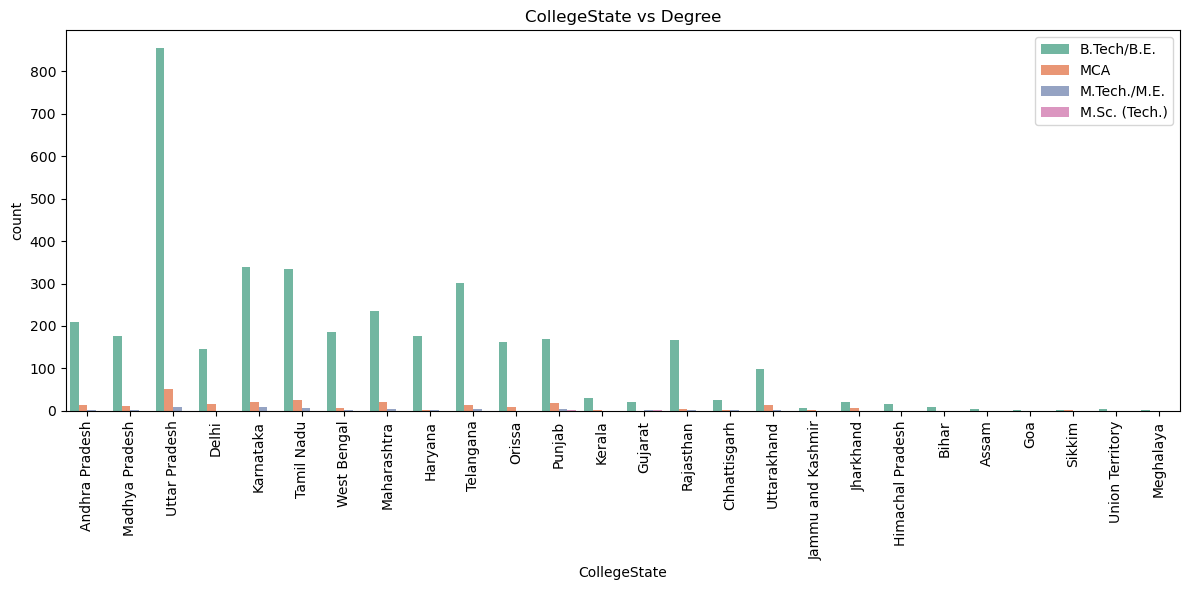

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\1766713878.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


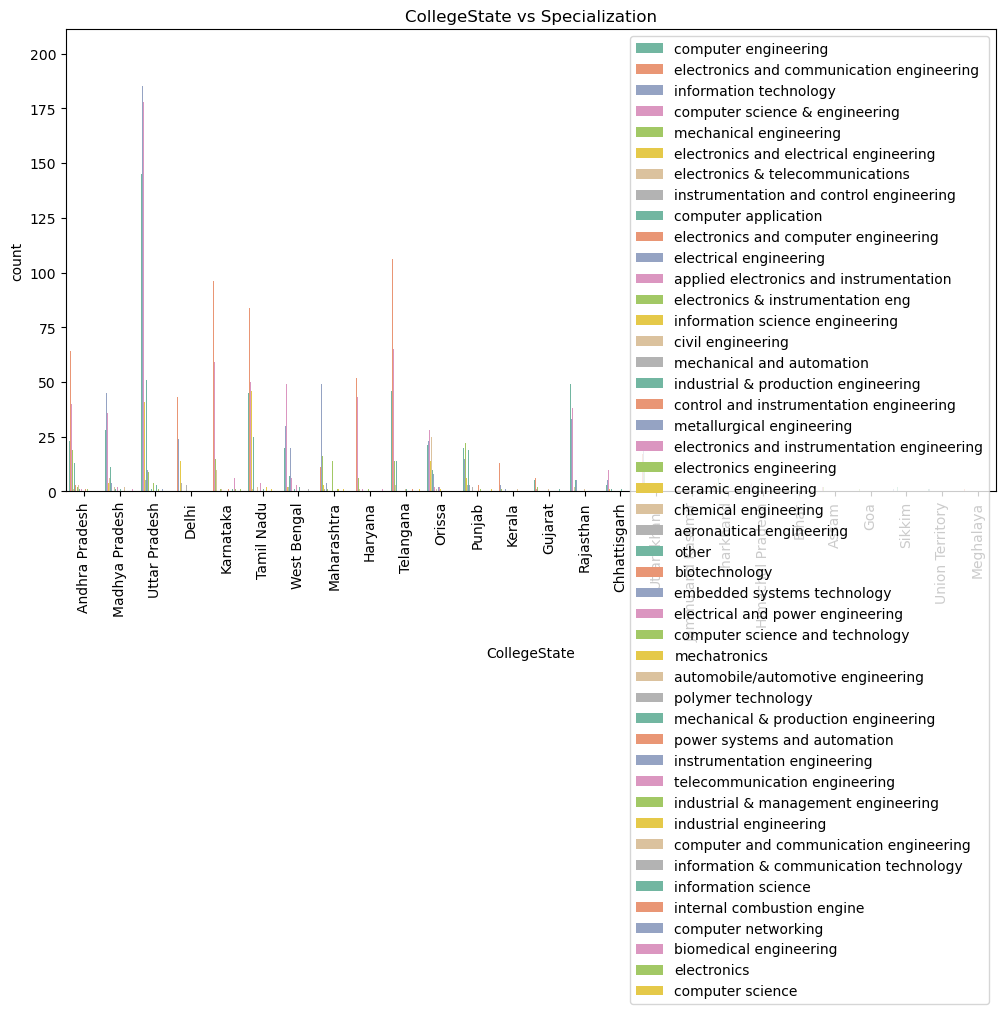

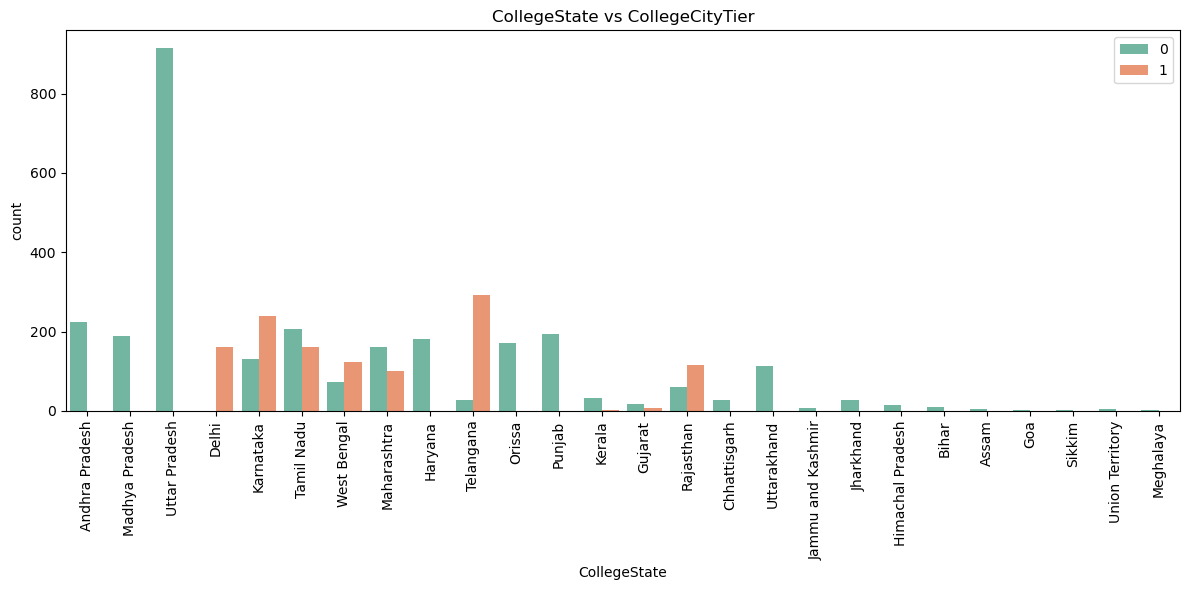

In [176]:
# Bivariate Analysis for relationships between categorical columns
for cat_col1 in categorical_cols:
    for cat_col2 in categorical_cols:
        if cat_col1 != cat_col2:
            plt.figure(figsize=(12, 6))
            sns.countplot(data=df, x=cat_col1, hue=cat_col2, palette='Set2')
            plt.title(f'{cat_col1} vs {cat_col2}')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.legend(loc='upper right')
            plt.show()

From the plot Gender Vs degree
- Most of the male and female employees degree is B.Tech and then MCA

From the plot Gender Vs Specialization
- Both Male and female employees specialization Electronics and communication engineering and computer Science engineering.
- But the male count is high in specialization

From the plot Degree and specialization
- In degree B.Tech is the one most of the graduates are from.
- And in Specialization electronics and communication and computer Science engineering is top.

From the plot Degree and college State
- most of the B.Tech graduates are from uttarpradesh

From the plot Gender and college State
- from every state male employees are high compared to female employees.
- and also most of the male employees are from uttarpradesh and then karnataka.



#### Research Questions
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [201]:
filtered_specialization=df[df["Specialization"].isin(['computer engineering','computer science & engineering','computer application',
                          'computer science and technology','computer networking','computer science'])]

In [212]:
df[df['Designation'].isin(['senior software engineer', 'java software engineer','software engineer','programmer analyst',
                           'associate software engineer','jr. software engineer','assistant software engineer',
                           'junior software engineer','trainee software engineer','programmer analyst trainee',
                           'software trainee','software engineer trainee','software engineere',
                           'software engineer associate','software engg','associate system engineer',
                           'associate software engg','software enginner','software engineering associate',
                           'Hardware Engineer','Associate Engineer','software eng','program analyst trainee',
                           'software trainee engineer','delivery software engineer',])]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3,1100000.0,2011-07-01,2024-02-22,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007-01-01,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011-01-01,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.4078,-0.9194
6,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010-01-01,67.50,state board,2,B.Tech/B.E.,computer science & engineering,72.98,1,Karnataka,2014-01-01,590,435,380,0.356536,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
14,300000.0,2013-07-01,2024-02-22,java software engineer,Bangalore,m,1992-07-02,81.20,state board,2008-01-01,79.90,state board,2,B.Tech/B.E.,instrumentation and control engineering,67.67,0,Uttar Pradesh,2013-01-01,395,565,645,-1.000000,0.7027,0.7119,0.0100,-0.9950,0.6721
19,325000.0,2014-09-01,2024-02-22,software engineer,Pune,f,1990-11-30,79.00,cbse,2008-01-01,62.20,cbse,2,B.Tech/B.E.,computer engineering,76.30,0,Uttar Pradesh,2012-01-01,485,445,435,0.864685,0.8192,0.2668,-0.2714,-0.4078,-0.1295
20,320000.0,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,2006-01-01,84.63,karnataka pre university board,2,B.Tech/B.E.,computer engineering,78.15,0,Karnataka,2010-01-01,455,535,445,0.635979,-0.1082,0.9688,0.5269,-0.2902,0.3444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,160000.0,2012-05-01,2014-06-01,java software engineer,Secunderabad,m,1989-06-10,83.00,ssc,2006-01-01,66.00,boardofintermediate,2,MCA,computer application,81.00,0,Andhra Pradesh,2012-01-01,555,595,515,0.864685,-0.0154,0.5454,0.6248,-1.2486,1.0554
3984,480000.0,2011-12-01,2024-02-22,software engineer,Gurgaon,f,1990-01-18,89.80,cbse,2007-01-01,83.80,cbse,2,B.Tech/B.E.,computer engineering,70.00,0,Haryana,2011-01-01,535,455,525,0.843124,-0.2628,0.1888,0.3817,-0.2902,1.6082
3989,300000.0,2014-09-01,2024-02-22,software engineer,Bangalore,m,1991-11-23,74.88,state board,2010-01-01,82.55,state board,2,B.Tech/B.E.,computer science & engineering,80.00,0,Karnataka,2014-01-01,500,480,500,0.356536,0.1282,0.0459,1.2396,1.0333,0.6721
3993,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006-01-01,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,Haryana,2010-01-01,365,334,475,0.276047,-0.1082,0.3448,0.2366,0.6498,-0.9194


In [215]:
filtered_df1 = df[(df['Degree'] == 'B.Tech/B.E.') & 
                 (df["Specialization"].isin(['computer engineering','computer science & engineering','computer application','computer science and technology','computer networking','computer science']))& 
                 (df['Designation'].isin(['senior software engineer', 'java software engineer','software engineer','programmer analyst',
                           'associate software engineer','jr. software engineer','assistant software engineer',
                           'junior software engineer','trainee software engineer','programmer analyst trainee',
                           'software trainee','software engineer trainee','software engineere',
                           'software engineer associate','software engg','associate system engineer',
                           'associate software engg','software enginner','software engineering associate',
                           'Hardware Engineer','Associate Engineer','software eng','program analyst trainee',
                           'software trainee engineer','delivery software engineer',]))]

# Calculate the average salary
average_salary = filtered_df1['Salary'].mean()
print(average_salary)
# Define the claimed salary range
claimed_salary_range = (250000, 300000)

# Compare the average salary with the claimed salary range
if claimed_salary_range[0] <= average_salary <= claimed_salary_range[1]:
    print(f"The average salary ({average_salary:.2f} lakhs) of individuals with Computer Science Engineering degree and specified job titles falls within the claimed salary range.")
else:
    print(f"The average salary ({average_salary:.2f} lakhs) of individuals with Computer Science Engineering degree and specified job titles does not fall within the claimed salary range.")


359845.6057007126
The average salary (359845.61 lakhs) of individuals with Computer Science Engineering degree and specified job titles does not fall within the claimed salary range.


-Here the hypothesis is failed 

#### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [220]:
# Create a contingency table of gender and specialization
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])


# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nResults of Chi-square test:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nThere is a significant relationship between gender and specialization.")
else:
    print("\nThere is no significant relationship between gender and specialization.")

# Print the contingency table
print("Contingency Table:")
contingency_table


Results of Chi-square test:
Chi-square statistic: 104.14994896714552
P-value: 1.3704397838344918e-06
Degrees of freedom: 45
Expected frequencies table:
[[7.18288717e-01 2.15486615e+00 1.19714786e+00 4.78859144e-01
  3.59144358e+00 2.39429572e-01 2.15486615e+00 6.94345759e+00
  2.39429572e-01 5.84208156e+01 1.43657743e+02 2.39429572e-01
  4.78859144e-01 1.78135602e+02 1.43657743e+00 2.39429572e-01
  4.78859144e-01 1.96332249e+01 2.39429572e-01 7.66174631e+00
  2.89709782e+01 2.10698024e+02 7.18288717e-01 4.69281961e+01
  6.46459845e+00 4.54916187e+00 2.39429572e-01 2.39429572e-01
  2.39429572e+00 4.78859144e-01 4.78859144e-01 2.39429572e-01
  6.46459845e+00 1.58023518e+02 4.78859144e+00 9.57718289e-01
  2.39429572e-01 2.39429572e-01 1.19714786e+00 4.78859144e+01
  9.57718289e-01 4.78859144e-01 3.11258444e+00 2.39429572e-01
  2.39429572e-01 1.43657743e+00]
 [2.28171128e+00 6.84513385e+00 3.80285214e+00 1.52114086e+00
  1.14085564e+01 7.60570428e-01 6.84513385e+00 2.20565424e+01
  7.6057

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,computer engineering,computer networking,computer science,computer science & engineering,computer science and technology,control and instrumentation engineering,electrical and power engineering,electrical engineering,electronics,electronics & instrumentation eng,electronics & telecommunications,electronics and communication engineering,electronics and computer engineering,electronics and electrical engineering,electronics and instrumentation engineering,electronics engineering,embedded systems technology,industrial & management engineering,industrial & production engineering,industrial engineering,information & communication technology,information science,information science engineering,information technology,instrumentation and control engineering,instrumentation engineering,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
f,1,2,0,2,9,0,1,6,0,59,175,0,1,183,2,0,0,17,0,10,28,212,0,34,5,3,0,0,2,1,2,0,8,173,9,0,0,0,0,10,1,0,0,0,0,1
m,2,7,5,0,6,1,8,23,1,185,425,1,1,561,4,1,2,65,1,22,93,668,3,162,22,16,1,1,8,1,0,1,19,487,11,4,1,1,5,190,3,2,13,1,1,5


## Conclusion

- most of the employees are from B.Tech and also they are mostly male candidates.
- most of theirs college state is uttarpradesh.
- Both Male and female employees specialization Electronics and communication engineering and computer Science engineering.
- rom every state male employees are high compared to female employees.

From Reasearch Questions
- The candidates from the speacilaztion Computer science engineering and if they took up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer can earn greater than 3.5 lakhs as a fresh graduate.

- There is a significant relationship between gender and specialization.